In [1]:
import pyodbc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, r2_score, classification_report, roc_auc_score,confusion_matrix, mean_squared_error
from sklearn.preprocessing import StandardScaler

In [2]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '{:,.2f}'.format(x))

In [3]:

server = '45.117.83.230,1433'  # Tên hoặc địa chỉ IP của máy chủ SQL
database = 'DA_FINALTEST'
username = 'Student_DA_Q1' # Tên đăng nhập
password = '@MindXDream2023'  # Mật khẩu
driver = '{ODBC Driver 17 for SQL Server}'  # Driver ODBC (phiên bản có thể thay đổi)

# Tạo kết nối
connection_string = f'DRIVER={driver};SERVER={server};DATABASE={database};UID={username};PWD={password}'
conn = pyodbc.connect(connection_string)

# Tạo cursor để thực thi truy vấn
cursor = conn.cursor()

# Thực thi truy vấn SQL
query = 'SELECT * FROM  [dbo].[CarPrice_Assignment]'  # Thay đổi câu lệnh SQL phù hợp với nhu cầu của bạn
df = pd.read_sql(query,conn)
conn.close()


C:\Users\baoch\AppData\Local\Temp\ipykernel_10200\1392675878.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query,conn)


In [4]:
df_copy = df.copy()
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
df_copy.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00
mean,103.00,0.83,923.69,"1,597.50",616.19,491.20,"2,555.57",126.91,316.86,329.49,74.57,104.12,"5,125.12",25.22,30.75,"102,468.95"
std,59.32,1.25,229.28,471.81,156.57,146.57,520.68,41.64,68.66,429.11,99.37,39.54,476.99,6.54,6.89,"1,246,484.39"
min,1.00,-2.00,93.00,150.00,64.00,51.00,"1,488.00",61.00,35.00,28.00,7.00,48.00,"4,150.00",13.00,16.00,"5,118.00"
25%,52.00,0.00,945.00,"1,624.00",638.00,508.00,"2,145.00",97.00,305.00,268.00,9.00,70.00,"4,800.00",19.00,25.00,"7,788.00"
50%,103.00,1.00,963.00,"1,724.00",654.00,541.00,"2,414.00",120.00,327.00,319.00,85.00,95.00,"5,200.00",24.00,30.00,"10,595.00"
75%,154.00,2.00,"1,004.00","1,803.00",665.00,555.00,"2,935.00",141.00,354.00,339.00,94.00,116.00,"5,500.00",30.00,34.00,"16,558.00"
max,205.00,3.00,"1,209.00","2,081.00",723.00,598.00,"4,066.00",326.00,394.00,"3,255.00",941.00,288.00,"6,600.00",49.00,54.00,"17,859,167.00"


In [6]:
for i in df_copy.columns: 
    print (f'Column name {i} with unique values {df[i].unique()}')
    print('xxxx-------xxxx'*4)

Column name car_ID with unique values [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205]
xxxx-------xxxxxxxx-------xxxxxxxx-------xxxxxxxx-------xxxx
Column name symboling with unique values [ 3  1  2  0 -1 -2]
xxxx---

**OUTLIER**

Min Price: 5,118 USD

Max Price: 17,859,167 USD 

Mean Price: 102,468.95 USD

=> Outlier cao nên cần phải loại bỏ các giá trị outlier 


In [7]:
## Find outlier 
percentile_95 = df_copy['price'].quantile (0.95)
percentile_05 = df_copy['price'].quantile (0.05)
print(f'Giá trị phân vị đến 95% của cột price là {percentile_95}')
print(f'Giá trị phân vị đến 5% của cột price là {percentile_05}')
## Replace the price column: 
df_copy = df_copy[(df_copy['price'] <= percentile_95) & (df_copy['price'] >= percentile_05)]


Giá trị phân vị đến 95% của cột price là 35451.19999999999
Giá trị phân vị đến 5% của cột price là 6197.0


In [8]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            183 non-null    int64  
 1   symboling         183 non-null    int64  
 2   CarName           183 non-null    object 
 3   fueltype          183 non-null    object 
 4   aspiration        183 non-null    object 
 5   doornumber        183 non-null    object 
 6   carbody           183 non-null    object 
 7   drivewheel        183 non-null    object 
 8   enginelocation    183 non-null    object 
 9   wheelbase         183 non-null    float64
 10  carlength         183 non-null    float64
 11  carwidth          183 non-null    float64
 12  carheight         183 non-null    float64
 13  curbweight        183 non-null    int64  
 14  enginetype        183 non-null    object 
 15  cylindernumber    183 non-null    object 
 16  enginesize        183 non-null    int64  
 17  fu

# DATA PREPROCESSING 

In [9]:
## Lower the column name 
df_copy.columns= df_copy.columns.str.lower()

## Delete the column not means to analyst 
df_copy.drop(columns={'car_id','highwaympg'}, inplace= True)

## Check missing value 
print(f'Số dòng bị null là {df_copy.isnull().sum()}')

## Check duplicate values
print(f'Số dòng bị lặp lại là {df_copy.duplicated().sum()}')

## Transform column "doornumber" and "cylindernumber" to numeric
df_copy.doornumber = df_copy.doornumber.map({'two':2,
                                                'four':4})
df_copy.cylindernumber = df_copy.cylindernumber.map({'four':4, 'six':6, 'five':5, 'two':2, 'eight':8})

Số dòng bị null là symboling           0
carname             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
price               0
dtype: int64
Số dòng bị lặp lại là 0


In [10]:
df_copy['carname'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'bmw 320i', 'bmw x1',
       'bmw x3', 'bmw z4', 'bmw x4', 'chevrolet monte carlo',
       'chevrolet vega 2300', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ', 'jaguar xj',
       'mazda rx2 coupe', 'mazda rx-4', 'mazda glc deluxe', 'mazda 626',
       'mazda glc', 'mazda rx-7 gs', 'mazda glc 4', 'mazda glc custom l',
       'mazda glc custom', 'buick electra 225 custom',
       'buick century luxus (sw)', 'buick century', 'buick skyhawk',
       'buick opel isuz

TOP BRAND CAR WITH HIGH PRICE AND HIGH SELLER QUANTITY

In [11]:
df_copy['brand_name'] = df_copy['carname'].str.split(" ", expand=True)[0]

# Correct misspelled brand names
df_copy['brand_name'] = df_copy['brand_name'].replace({'porcshce': 'porsche', 'toyouta': 'toyota', 'vokswagen' : 'volkswagen'})

# Display unique brand names
df_copy['brand_name'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'vw', 'volvo'], dtype=object)

* **TOP HIGH PRICE**

In [12]:
avg_car_price = df_copy.groupby('brand_name').price.mean().sort_values(ascending=False).reset_index().head(10)
avg_car_price
# Lưu kết quả vào DataFrame mới
# avg_car_price_df = pd.DataFrame(avg_car_price)

# # Chọn 20 xe bán chạy nhất
# top_20_best_sales = avg_car_price_df.head(20)



,brand_name,price
0,jaguar,"32,250.00"
1,buick,"30,469.33"
2,porsche,"29,524.67"
3,bmw,"21,792.50"
4,volvo,"18,063.18"
5,audi,"17,859.17"
6,mercury,"16,503.00"
7,alfa-romero,"15,498.33"
8,peugeot,"15,489.09"
9,saab,"15,223.33"


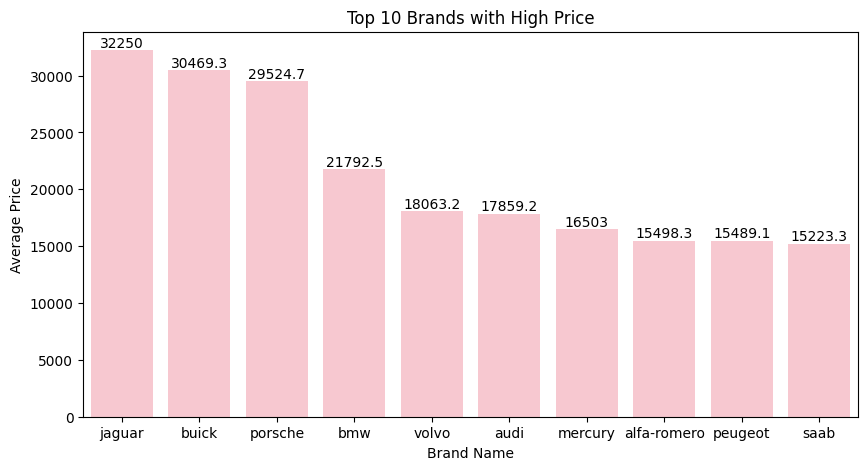

In [13]:
# Vẽ biểu đồ
plt.figure(figsize=(10, 5))
ax = sns.barplot(x='brand_name', y='price', data=avg_car_price, color='pink')
# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('Brand Name')
plt.ylabel('Average Price')
plt.title('Top 10 Brands with High Price')
plt.show()

* **TOP HIGH SELLER**

In [14]:
sum_quantity= df_copy.groupby('brand_name').price.count().sort_values(ascending=False).reset_index().head(10)
sum_quantity

,brand_name,price
0,toyota,31
1,nissan,17
2,mazda,15
3,honda,12
4,mitsubishi,11
5,volvo,11
6,subaru,11
7,peugeot,11
8,volkswagen,10
9,dodge,8


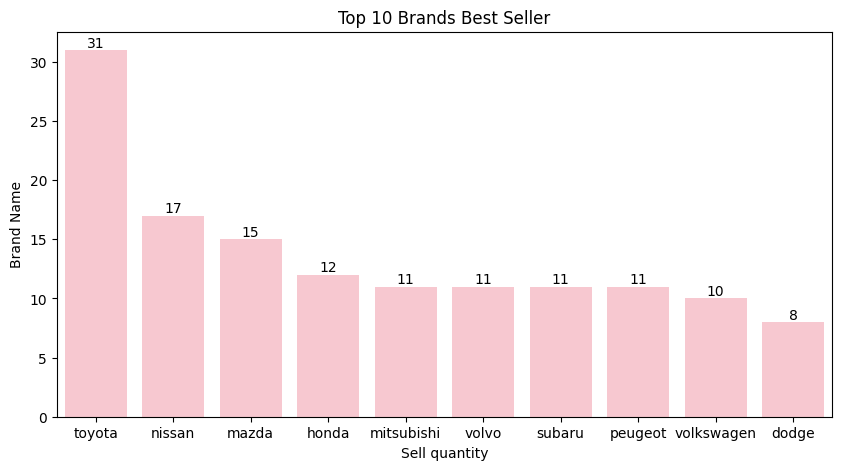

In [15]:
# Vẽ biểu đồ
plt.figure(figsize=(10, 5))
ax = sns.barplot(x='brand_name', y='price', data = sum_quantity, color='pink')
for z in ax.containers: 
    ax.bar_label(z)
plt.xlabel('Sell quantity')
plt.ylabel('Brand Name')
plt.title('Top 10 Brands Best Seller')
plt.show()

In [16]:
df_num = df_copy.select_dtypes(exclude = 'object')
df_cat = df_copy.select_dtypes(include = 'object')

# CHECK NUMERIC 

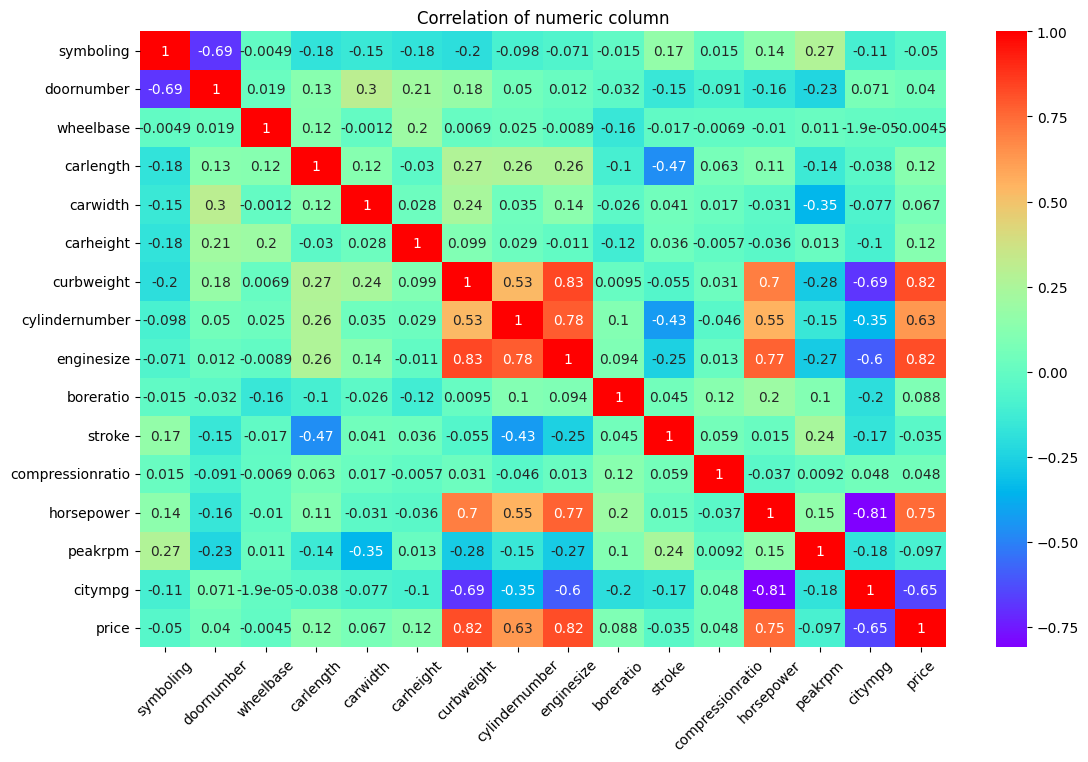

In [17]:
plt.figure(figsize=(13,8))
sns.heatmap(df_num.corr(), cmap='rainbow',annot=True)
plt.title('Correlation of numeric column')
plt.xticks(rotation = 45)
plt.show()

* **POSITIVE CORRELATION:**

Curb weight, cylinder number, engine size, and compression ratio all have a significant positive relationship with the price of a car.

* **NEGATIVE CORRELATION:**

City MPG and highway MPG indices (indicating fuel consumption savings) both have a negative relationship with the price of a car.

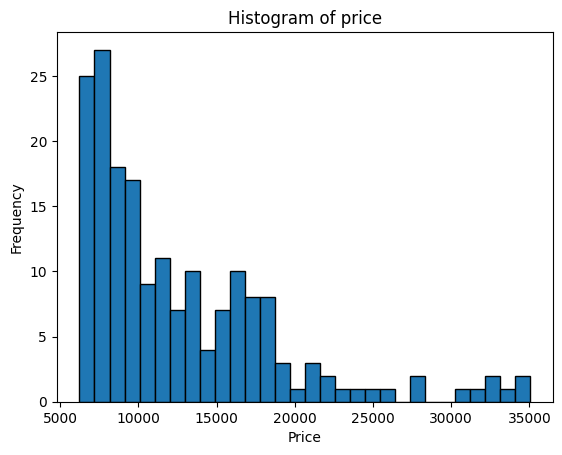

In [18]:
plt.hist(x=df_copy['price'], bins = 30,edgecolor = 'k')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title("Histogram of price")
plt.show()

# CHECK CATEGORIES

In [19]:
df_copy.drop(columns=['brand_name','carname'], inplace=True)
df_cat.drop(columns=['brand_name','carname'], inplace=True)

C:\Users\baoch\AppData\Local\Temp\ipykernel_10200\1668930775.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_cat, x=col, palette='rainbow')
C:\Users\baoch\AppData\Local\Temp\ipykernel_10200\1668930775.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_cat, x=col, palette='rainbow')
C:\Users\baoch\AppData\Local\Temp\ipykernel_10200\1668930775.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_cat, x=col, palette='rainbow')
C:\Users\baoch\AppData\Local\Temp\ipykernel_10200\1668930775.py:4: Fut

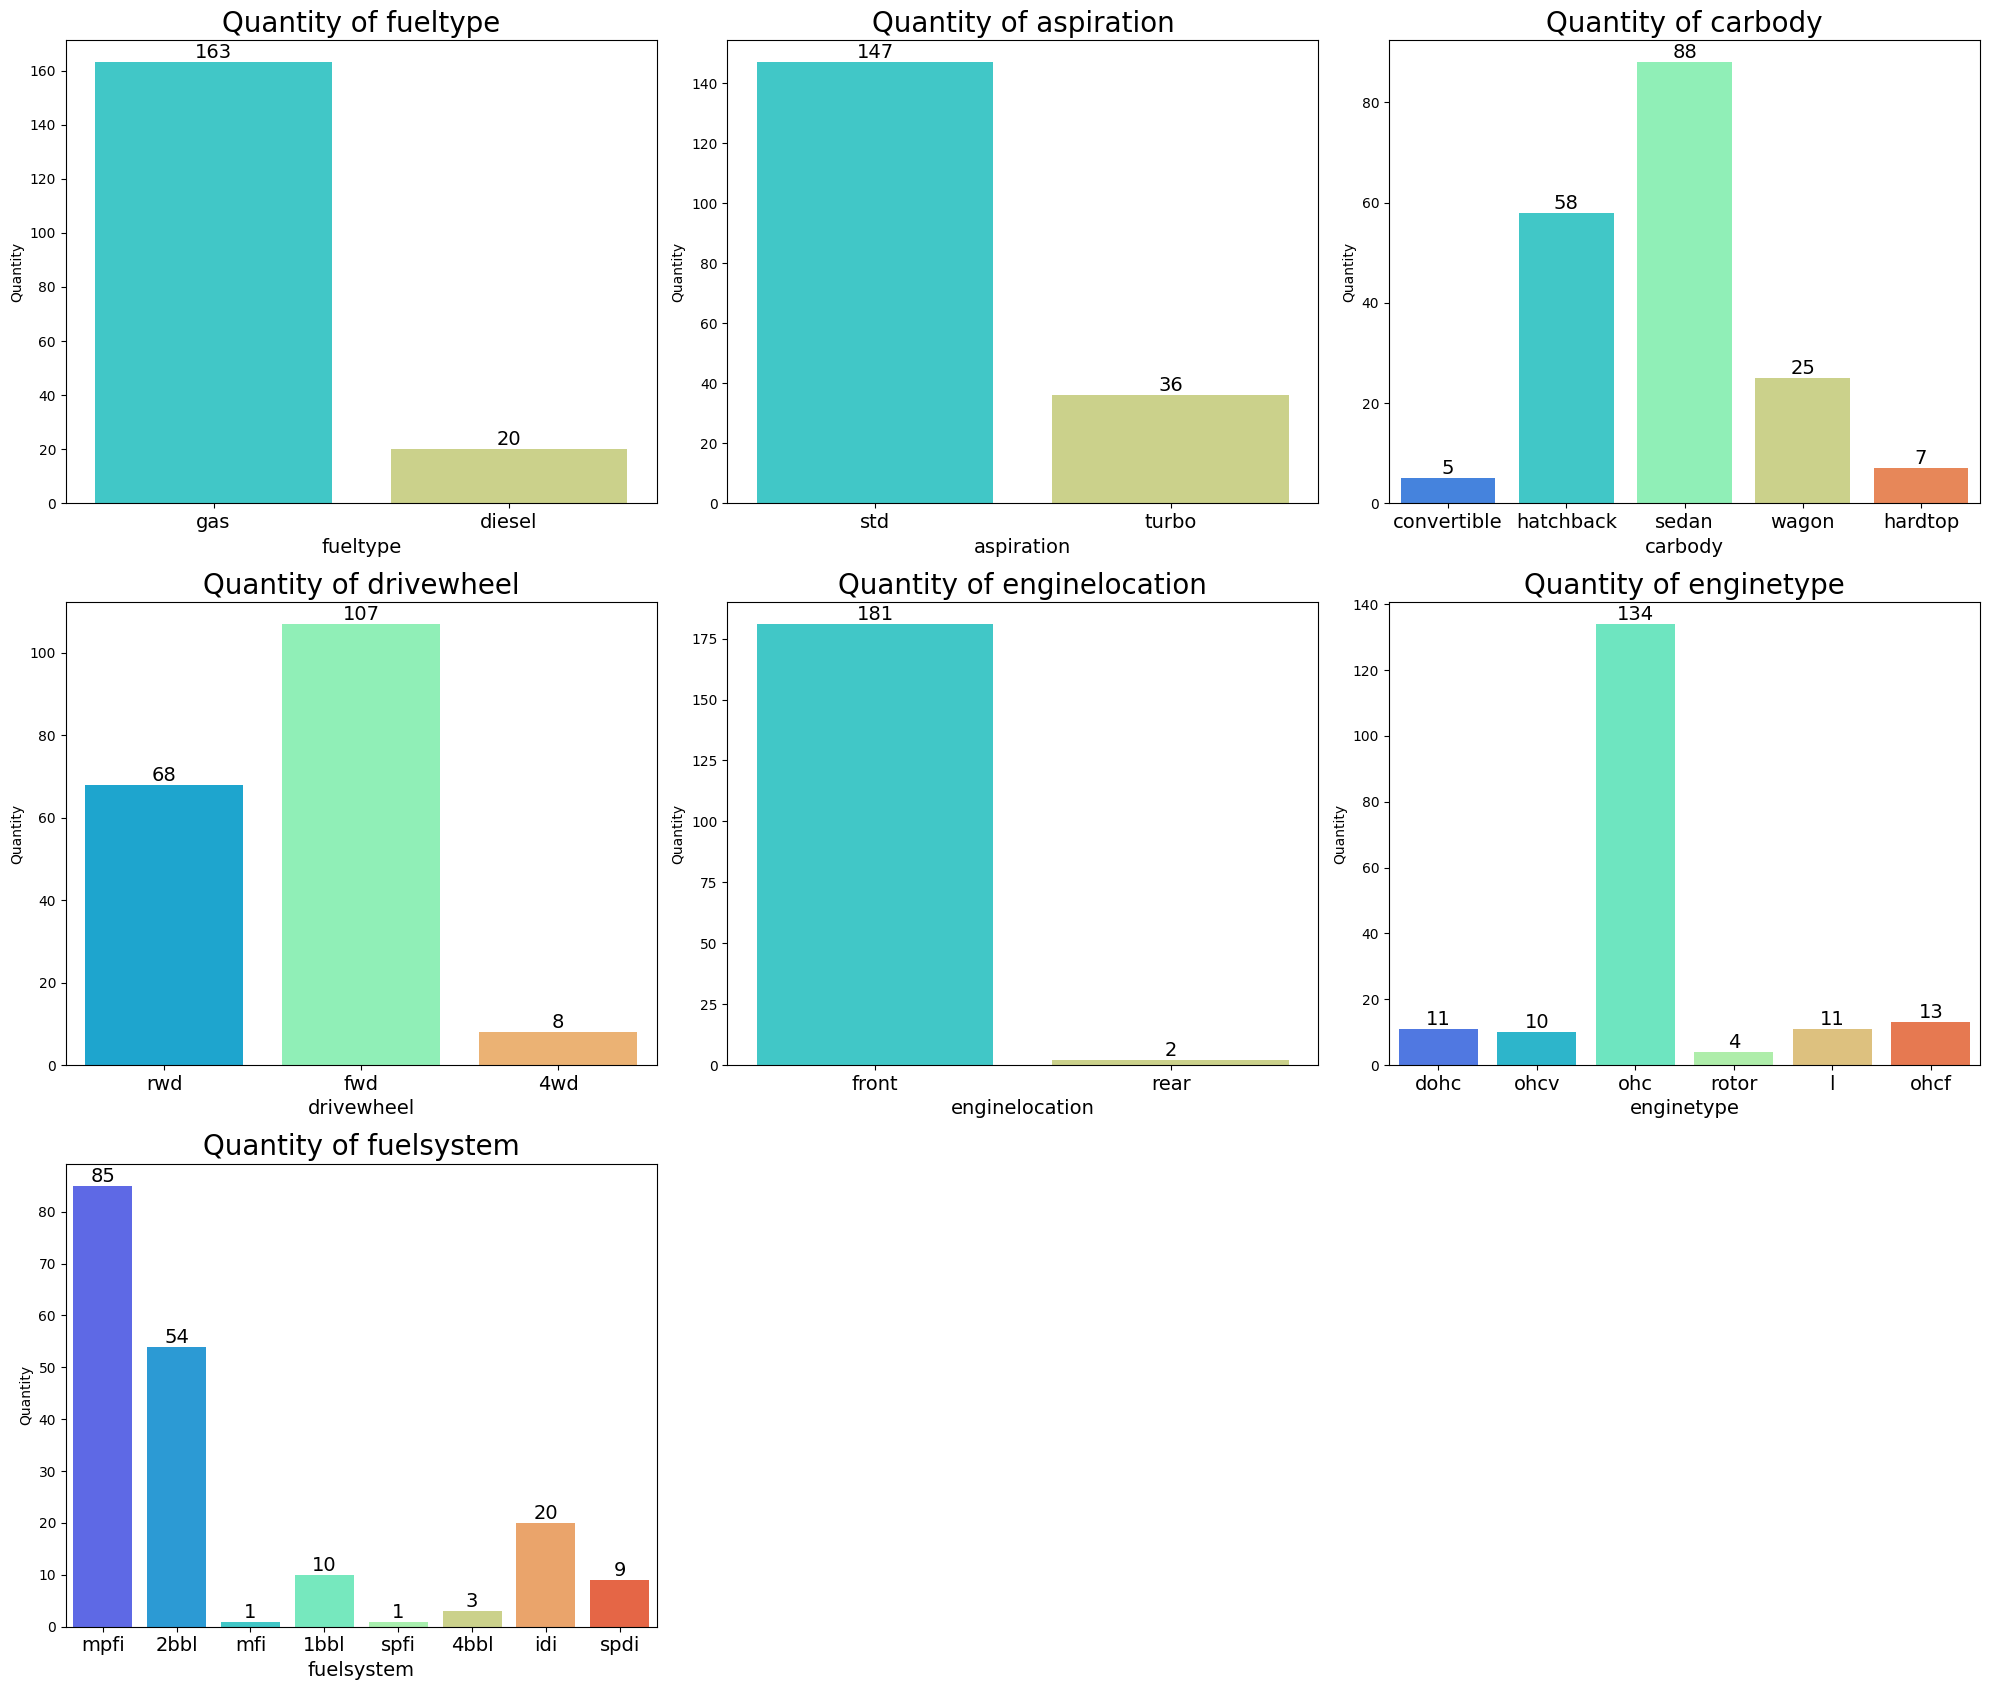

In [20]:
plt.figure(figsize=(20,17))
for i, col in enumerate(df_cat):
    plt.subplot(3, 3, i + 1)
    ax = sns.countplot(data=df_cat, x=col, palette='rainbow')
        # Annotate each bar with the count
    for val in ax.containers:
        ax.bar_label(val,fontsize = 14)
    plt.title(f'Quantity of {col}', fontsize = 20)
    plt.xticks(fontsize = 14)
    plt.xlabel(col, fontsize = 14)
    plt.ylabel('Quantity')

plt.tight_layout()
plt.show()

C:\Users\baoch\AppData\Local\Temp\ipykernel_10200\1208514512.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_copy, x=col, y = df_copy['price'], palette='rainbow')
C:\Users\baoch\AppData\Local\Temp\ipykernel_10200\1208514512.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_copy, x=col, y = df_copy['price'], palette='rainbow')
C:\Users\baoch\AppData\Local\Temp\ipykernel_10200\1208514512.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_copy, x=col, y = df_copy['price'], palette='rainbow')
C:\Users\baoch\AppData

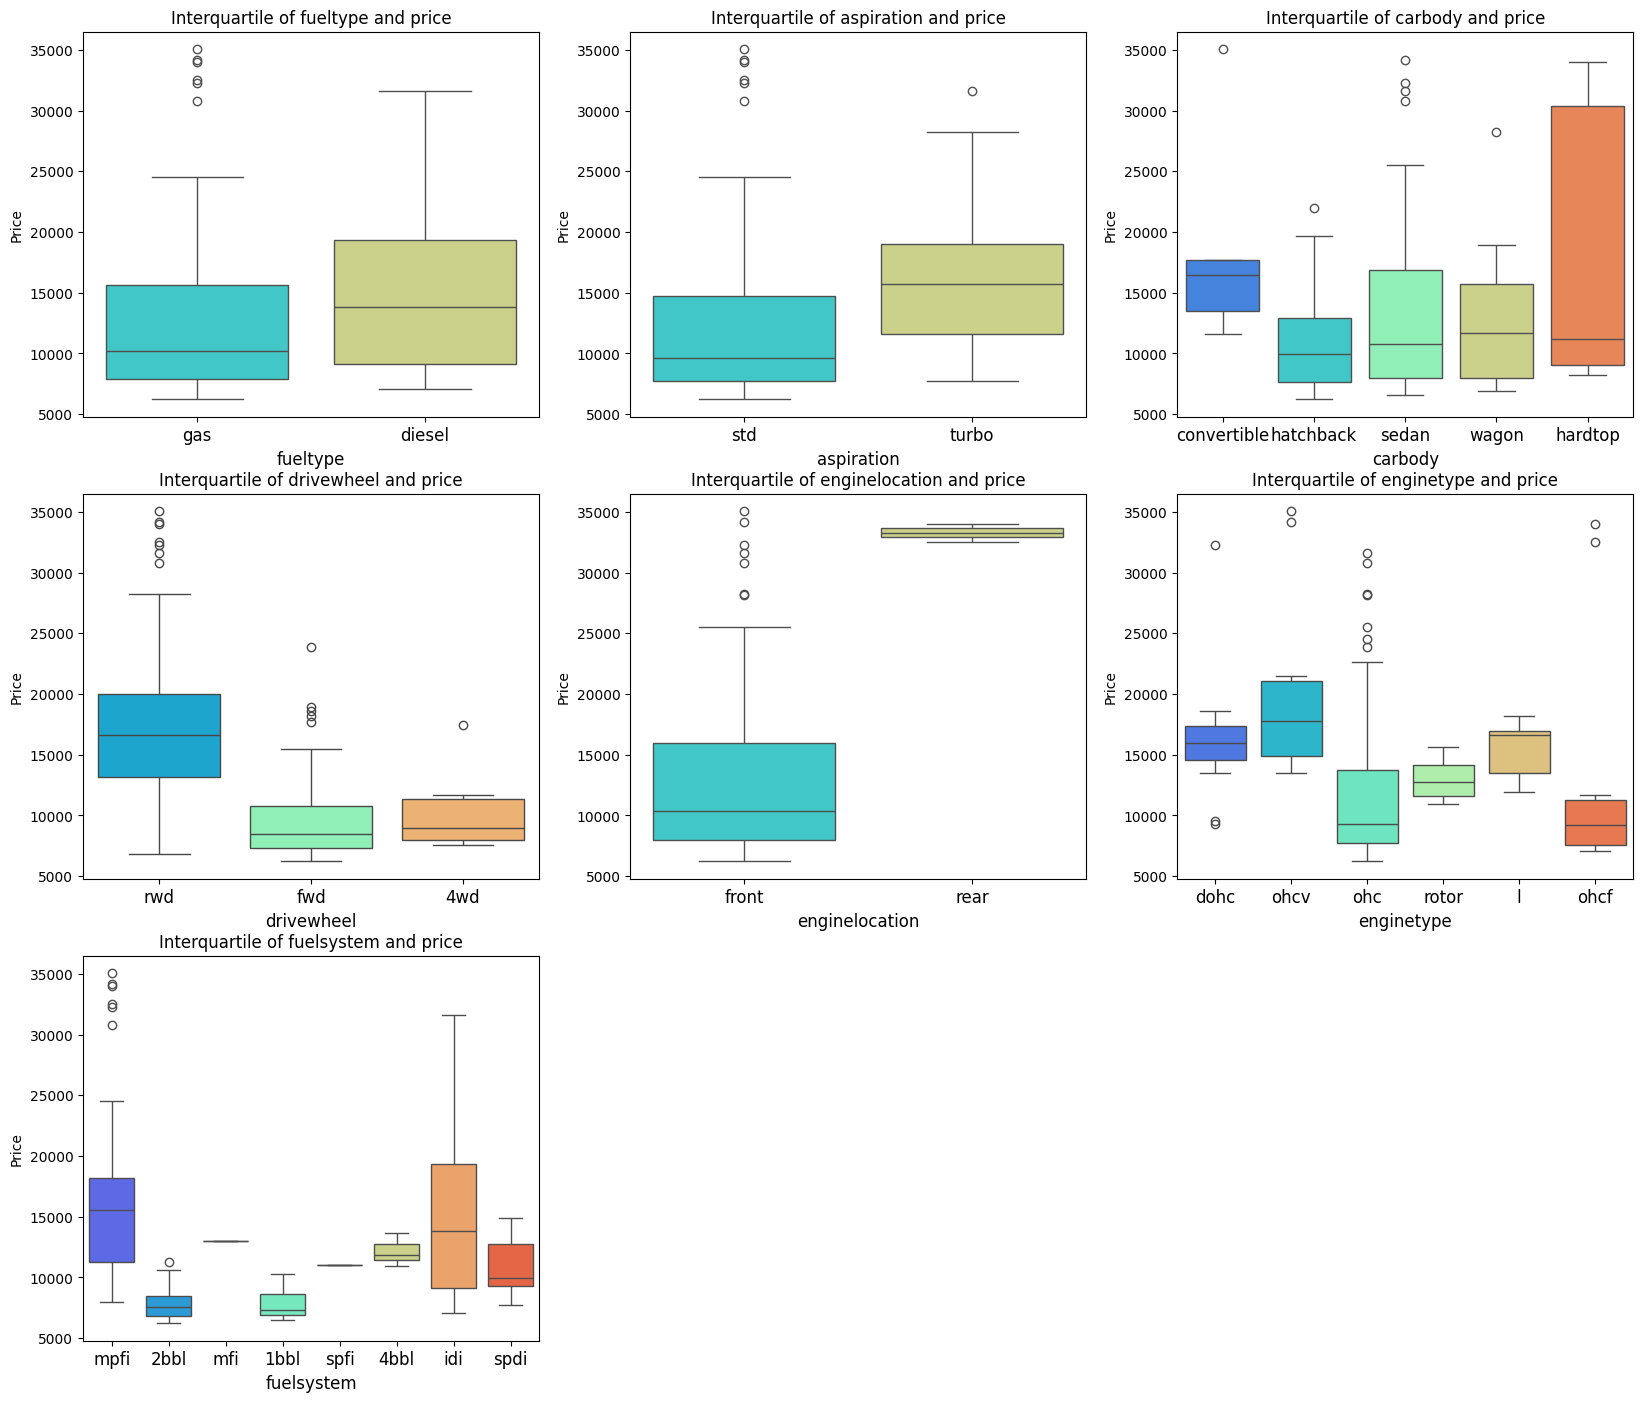

In [21]:
plt.figure(figsize=(20,35))
for i, col in enumerate(df_copy.select_dtypes(include='object')):
    plt.subplot(6, 3, i + 1)
    sns.boxplot(data=df_copy, x=col, y = df_copy['price'], palette='rainbow')
    plt.title(f'Interquartile of {col} and price', fontsize = 12)
    plt.xticks(fontsize = 12)
    plt.xlabel(col, fontsize = 12)
    plt.ylabel('Price')

plt.show()

* **Fueltype vs. Price:** 

Diesel cars have a higher median price compared to gas cars.

Diesel cars also show less variability in price compared to gas cars.

* **Aspiration vs. Price:** 

Turbocharged cars have a higher median price compared to standard (naturally aspirated) cars.

There is greater variability in the price of turbocharged cars compared to standard cars.

* **Carbody vs. Price:**

Hardtop cars have the highest median price, followed by convertibles.

Hatchback, sedan, and wagon cars have lower median prices, with wagons showing the least variability.

* **Drivewheel vs. Price:**

Rear-wheel-drive (RWD) cars have the highest median price, followed by four-wheel-drive (4WD) cars.

Front-wheel-drive (FWD) cars have the lowest median price and show less variability compared to RWD and 4WD cars.

* **Enginelocation vs. Price:**

Cars with rear engine locations have significantly higher prices compared to those with front engine locations.

Rear-engine cars show minimal variability in price, whereas front-engine cars show substantial variability.

* **Enginetype vs. Price:**

DOHC and OHCV engine types have higher median prices compared to other engine types.

OHCF engine types have the lowest median price.

There is considerable variability in prices for all engine types, with OHCV showing the most variability.

* **Fuelsystem vs. Price:**

Cars with 'mpfi' (multi-point fuel injection) fuel systems have the highest median price, followed by 'spdi' and 'idi' systems.

'2bbl' and '1bbl' systems have the lowest median prices and show less variability.

There is significant variability in prices across different fuel systems, with 'mpfi' showing the most variability.

# CHOOSE A MODEL

* **ONE HOT ENCODING**

In [22]:
df_copy = pd.get_dummies(df_copy, drop_first = True, dtype= int)

* **STANDARD SCALER**

In [23]:
ss = StandardScaler()
df_copy[['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'cylindernumber', 'enginesize',
        'boreratio','stroke', 'compressionratio', 'horsepower', 
        'peakrpm', 'citympg']] = ss.fit_transform(df_copy[['symboling', 'doornumber',
        'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 
        'cylindernumber', 'enginesize', 'boreratio','stroke', 
        'compressionratio', 'horsepower', 'peakrpm', 'citympg']])

In [24]:
df_copy

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1.70,-1.24,-0.25,0.18,0.14,-0.05,-0.02,-0.33,0.18,0.43,-0.15,-0.78,0.28,-0.23,-0.69,"13,495.00",1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1.70,-1.24,-0.25,0.18,0.14,-0.05,-0.02,-0.33,0.18,0.43,-0.15,-0.78,0.28,-0.23,-0.69,"16,500.00",1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.14,-1.24,0.03,0.23,0.23,0.21,0.58,2.09,0.87,-0.78,0.03,-0.78,1.59,-0.23,-1.03,"16,500.00",1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
3,0.92,0.81,0.29,0.35,0.28,0.34,-0.47,-0.33,-0.47,-0.00,-0.66,-0.76,0.00,0.80,-0.17,"13,950.00",1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,0.92,0.81,0.27,0.35,0.29,0.34,0.58,0.88,0.37,-0.00,-0.66,-0.79,0.40,0.80,-1.20,"17,450.00",1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1.42,0.81,0.74,0.61,0.46,0.42,0.86,-0.33,0.53,0.90,-0.04,0.28,0.37,0.59,-0.34,"16,845.00",1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
201,-1.42,0.81,0.74,0.61,0.45,0.42,1.06,-0.33,0.53,0.90,-0.04,0.18,1.77,0.39,-1.03,"19,045.00",1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
202,-1.42,0.81,0.74,0.61,0.46,0.42,0.98,2.09,1.53,0.59,-0.10,0.19,0.98,0.80,-1.20,"21,485.00",1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
203,-1.42,0.81,0.74,0.61,0.46,0.42,1.43,2.09,0.65,-0.28,-0.66,-0.60,0.12,-0.64,0.18,"22,470.00",0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0


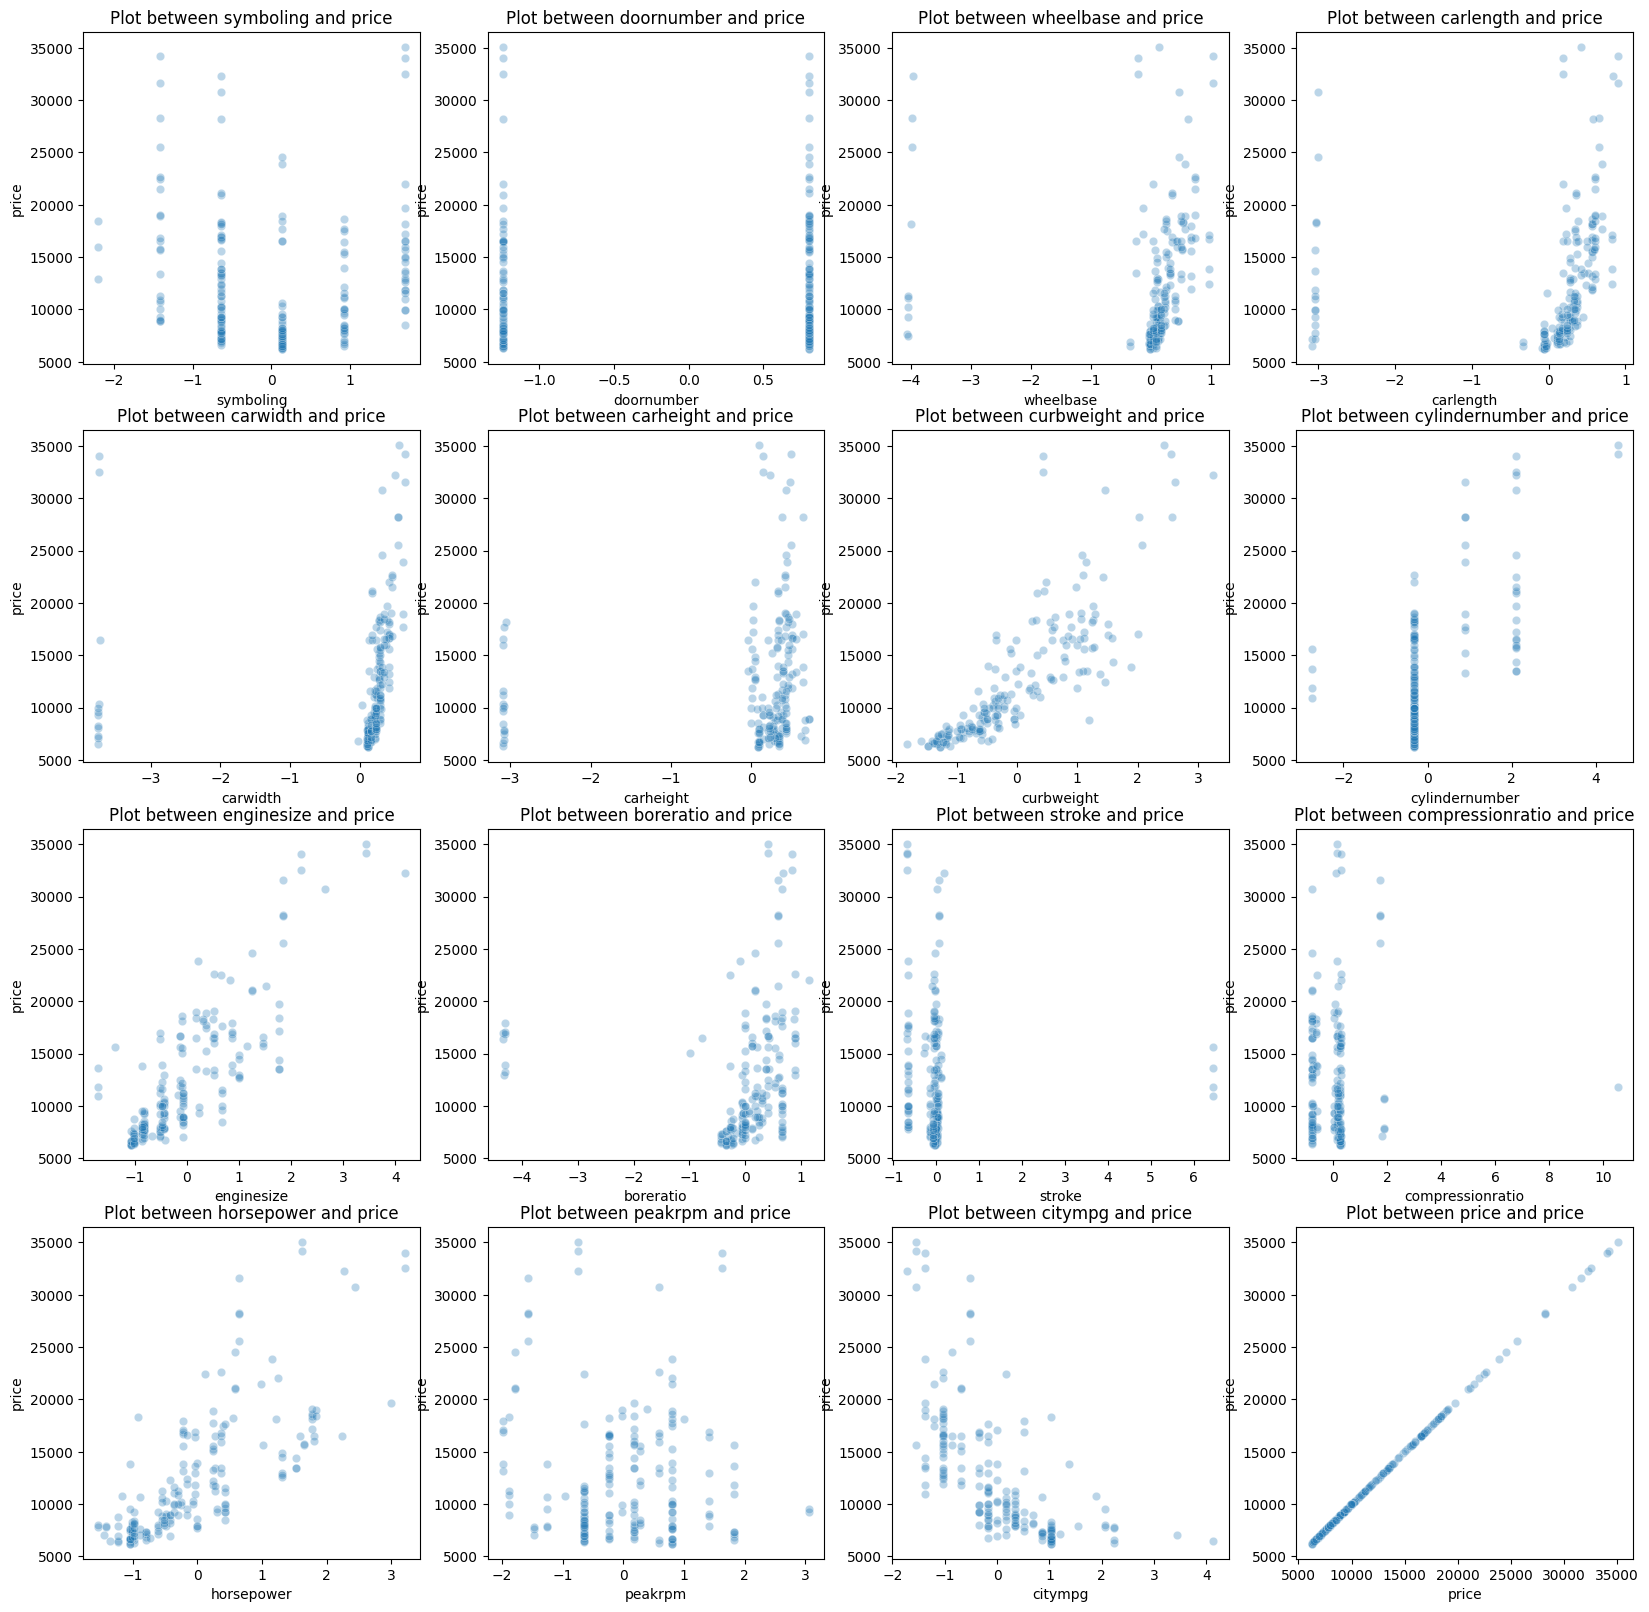

In [25]:
plt.figure(figsize=(20, 25))

for i, col in enumerate(df_copy.iloc[:,:16].columns):
    plt.subplot(5, 4, i + 1) 
    sns.scatterplot(x=col, y='price', data=df_copy, alpha = 0.3)
    plt.title(f'Plot between {col} and price')
plt.show()


In [26]:
X = df_copy.drop(columns = 'price')
y = df_copy['price']

* **LINEAR REGRESSION**

In [27]:
lr = LinearRegression()
accuracy = []
for i in range(30,50):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state= i)
    lr.fit(X_train,y_train)
    y_pred = lr.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    accuracy.append({'random_state':i, 'r2_score_1':r2,'mse_1':mse})
df_accurancy = pd.DataFrame(accuracy)
df_accurancy 


,random_state,r2_score_1,mse_1
0,30,0.44,"10,559,207.51"
1,31,0.79,"4,846,155.65"
2,32,0.82,"11,192,228.46"
3,33,0.82,"6,361,892.48"
4,34,0.87,"5,183,347.77"
5,35,0.85,"5,579,087.56"
6,36,0.92,"4,763,525.01"
7,37,0.83,"7,549,816.18"
8,38,0.86,"6,500,921.64"
9,39,0.72,"11,999,663.15"


* **SCATTERPLOT**

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state= 36)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

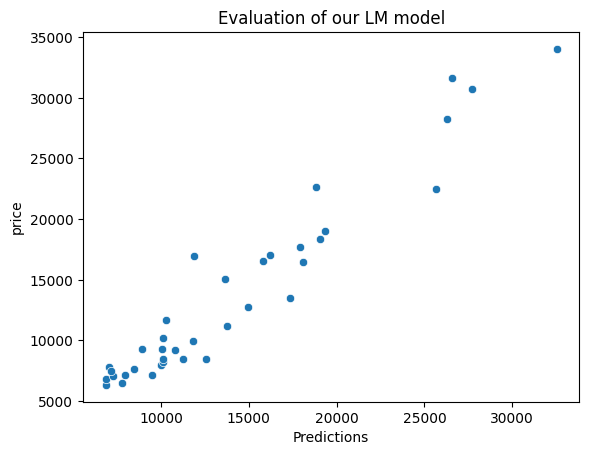

In [29]:
sns.scatterplot(x=y_pred,y=y_test)
plt.xlabel('Predictions')
plt.title('Evaluation of our LM model')
plt.show()

In [30]:
# Calculating the Coefficience
print(f'Coefficience of model is \n {lr.coef_}')

# Calculating the intercept
print (f'Intercept of model is \n {lr.intercept_}')

Coefficience of model is 
 [  397.08601032   108.13767686  -313.08769686  -418.13103376
    84.78591752   540.71762479  3944.92434907  2384.25898483
    61.41569874   162.91969362  -194.88792028  -176.90176244
   489.6211361    495.50792296   272.28718837  -244.81723394
  1365.83902359 -2616.27647721 -3691.54708384 -3355.62613382
 -5240.06377136  1887.39788301  3161.63610635  8179.37092407
   747.21735146  3396.48614472  3344.53134497 -2186.88676806
 10670.3594164    262.31926008 -1555.80294591   244.81723394
 -2353.94941527   456.07569388 -2371.29485215 -4354.51780067]
Intercept of model is 
 10902.720935139185


In [31]:
# residuals

pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df 

,Actual Value,Predicted Value,Difference
15,"30,760.00","27,734.54","3,025.46"
87,"9,279.00","10,056.13",-777.13
184,"7,995.00","9,991.24","-1,996.24"
124,"12,764.00","14,935.55","-2,171.55"
103,"13,499.00","17,367.97","-3,868.97"
11,"16,925.00","11,884.14","5,040.86"
62,"10,245.00","10,146.05",98.95
68,"28,248.00","26,275.71","1,972.29"
106,"18,399.00","19,063.42",-664.42
203,"22,470.00","25,666.67","-3,196.67"


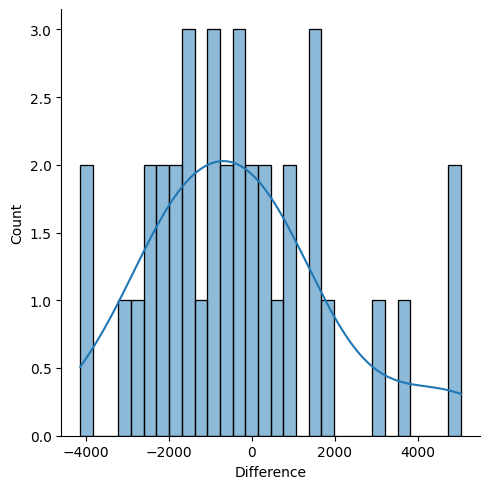

In [32]:
sns.displot(pred_df['Difference'], bins = 30, kde=True)

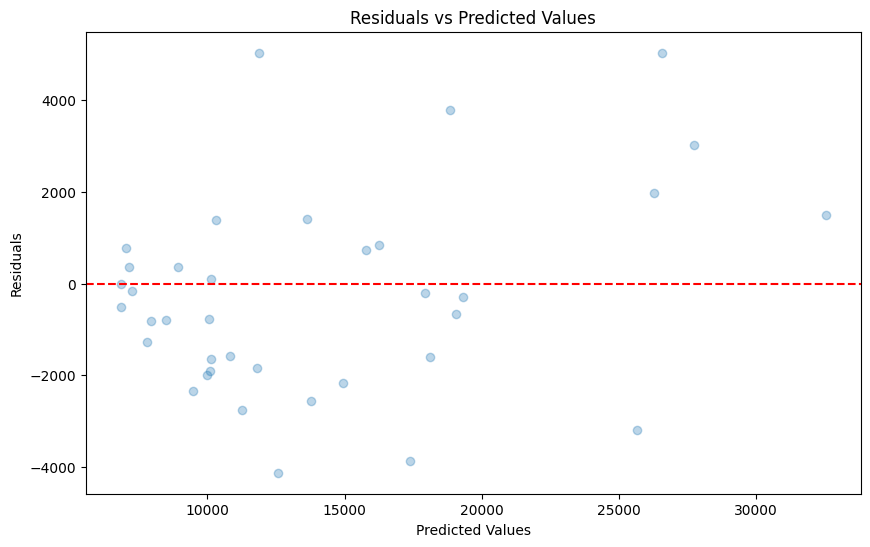

In [33]:
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, pred_df['Difference'], alpha=0.3)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

* **LINEAR REGREESION** USE NP.LOG1P

In [34]:
df_copy['price'] = np.log1p(df_copy['price'])

In [35]:
X = df_copy.drop(columns = 'price')
y = df_copy['price']

In [36]:
accuracy_1 = []
for i in range(30,50):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state= i)
    lr.fit(X_train,y_train)
    y_pred = lr.predict(X_test)
    r2 = r2_score(np.exp(y_test), np.exp(y_pred))
    mse = mean_squared_error(np.exp(y_test), np.exp(y_pred))
    accuracy_1.append({'random_state':i, 'r2_score_2':r2,'mse_2':mse})
df_accurancy_1 = pd.DataFrame(accuracy_1)

In [37]:
df_merge = pd.merge(df_accurancy,df_accurancy_1, on = 'random_state', how = 'right')
df_merge 

,random_state,r2_score_1,mse_1,r2_score_2,mse_2
0,30,0.44,"10,559,207.51",0.59,"7,795,459.58"
1,31,0.79,"4,846,155.65",0.82,"4,143,434.15"
2,32,0.82,"11,192,228.46",0.83,"10,519,417.78"
3,33,0.82,"6,361,892.48",0.81,"6,908,582.02"
4,34,0.87,"5,183,347.77",0.91,"3,318,835.26"
5,35,0.85,"5,579,087.56",0.91,"3,446,595.88"
6,36,0.92,"4,763,525.01",0.93,"4,015,390.41"
7,37,0.83,"7,549,816.18",0.88,"5,553,026.07"
8,38,0.86,"6,500,921.64",0.91,"4,173,954.40"
9,39,0.72,"11,999,663.15",0.69,"13,045,071.10"
